In [5]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label among the k neighbors
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


Accuracy with k=1: 0.98
Accuracy with k=3: 0.99
Accuracy with k=5: 0.99
Accuracy with k=7: 0.99
Accuracy with k=10: 0.98


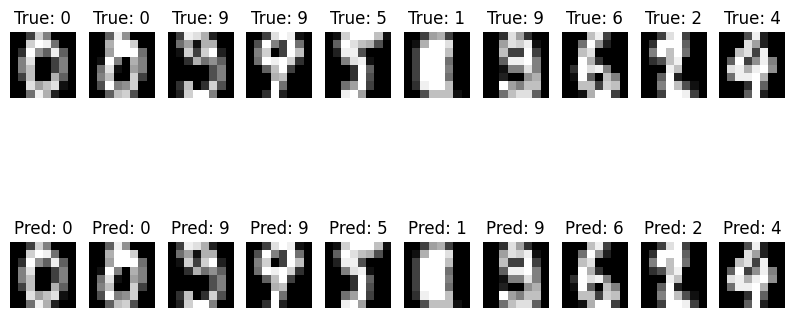

In [6]:
import matplotlib.pyplot as plt

# Load dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Experiment with different values of k
k_values = [1, 3, 5, 7, 10]
for k in k_values:
    # Initialize and train KNN
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with k={k}: {accuracy:.2f}")

# Optional: Visualize some test results
def plot_digits(images, labels, predictions, num=10):
    plt.figure(figsize=(10, 5))
    for i in range(num):
        plt.subplot(2, num, i + 1)
        plt.imshow(images[i].reshape(8, 8), cmap='gray')
        plt.title(f'True: {labels[i]}')
        plt.axis('off')
        plt.subplot(2, num, num + i + 1)
        plt.imshow(images[i].reshape(8, 8), cmap='gray')
        plt.title(f'Pred: {predictions[i]}')
        plt.axis('off')
    plt.show()

# Predict and visualize a subset of test data
sample_indices = np.random.choice(len(X_test), size=10, replace=False)
X_sample = X_test[sample_indices]
y_true = y_test[sample_indices]
y_pred = knn.predict(X_sample)

plot_digits(X_sample, y_true, y_pred)


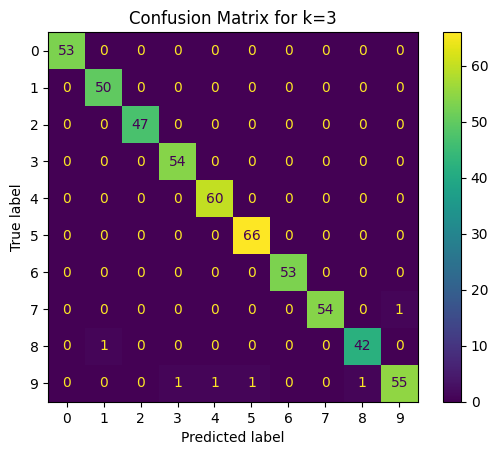

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Final KNN with best k
best_k = 3
knn = KNN(k=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap='viridis')
plt.title(f'Confusion Matrix for k={best_k}')
plt.show()


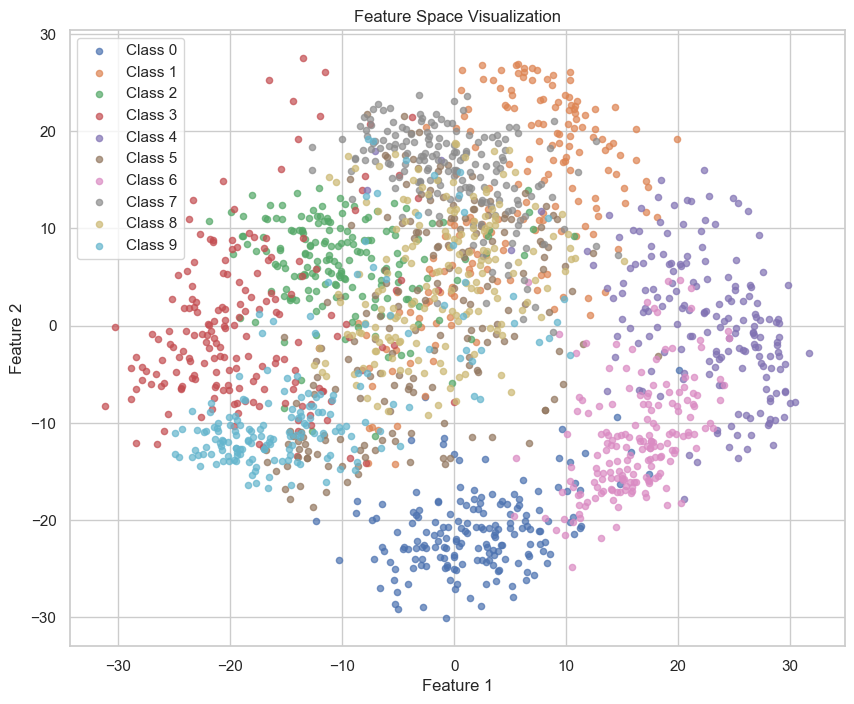

In [ ]:
import seaborn as sns

# Visualize learned feature space
def visualize_feature_space(X, y):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 8))
    for label in np.unique(y):
        plt.scatter(X[y == label, 0], X[y == label, 1], label=f'Class {label}', s=20, alpha=0.7)
    plt.legend()
    plt.title("Feature Space Visualization")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Project features using PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
visualize_feature_space(X_reduced, y)